This is scratch to replace the outliers of NDVI and EVI that are beyond 1 and -1

In [1]:
import csv
import numpy as np
import pandas as pd
# import geopandas as gpd
from IPython.display import Image
# from shapely.geometry import Point, Polygon
from math import factorial
import scipy
import scipy.signal
import os, os.path

from datetime import date
import datetime
import time

from statsmodels.sandbox.regression.predstd import wls_prediction_std
from sklearn.linear_model import LinearRegression
from patsy import cr

# from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sb

import sys

In [2]:
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/remote_sensing/python/')
import remote_sensing_core as rc
import remote_sensing_core as rcp

start_time = time.time()

In [3]:
data_dir = "/Users/hn/Documents/01_research_data/" + \
           "remote_sensing/01_NDVI_TS/00_Eastern_WA_withYear/2Years/"

param_dir = "/Users/hn/Documents/00_GitHub/Ag/remote_sensing/parameters/"

# Parameters

In [5]:
####################################################################################
###
###      Parameters                   
###
####################################################################################

SF_year = 2017
indeks = "EVI"

# Read the data

In [6]:
f_name = "Eastern_WA_" + str(SF_year) + "_70cloud_selectors.csv"
a_df = pd.read_csv(data_dir + f_name, low_memory=False)

##################################################################
##################################################################
####
####  plots has to be exact. So, we need 
####  to filter out NASS, and filter by last survey date
####
##################################################################
##################################################################

a_df = a_df[a_df['county']== "Grant"] # Filter Grant
# a_df = rc.filter_out_NASS(a_df) # Toss NASS
# a_df = rc.filter_by_lastSurvey(a_df, year = SF_year) # filter by last survey date
a_df['SF_year'] = SF_year


# Get a field's data

In [7]:
a_df.reset_index(drop=True, inplace=True)

In [8]:
a_df.shape

(4744940, 26)

# pick a field that has outliers

In [9]:
a_clean_df_EVI = rc.initial_clean_EVI(a_df)
clean_df_with_outliers = a_clean_df_EVI[a_clean_df_EVI.EVI > 1]
clean_df_with_outliers.reset_index(drop=True, inplace=True)

In [10]:
a_df_1 = a_df[a_df.ID == clean_df_with_outliers.ID[0]]
print (a_df_1.shape)

a_df_1 = rc.initial_clean_EVI(a_df_1)
# a_df_1.sort_values(by=['system_start_time'], inplace=True)
a_df_1.sort_values(by=['image_year', 'doy'], inplace=True)
print (a_df_1.shape)
print()
print (max(a_df_1.NDVI))
print (min(a_df_1.NDVI))

print (max(a_df_1.EVI))
print (min(a_df_1.EVI))
print(a_df_1.shape)

(268, 26)
(57, 26)

0.815794653490361
0.03896769117695066
1.5
0.04831437323534887
(57, 26)


In [11]:
a_df_1.shape

(57, 26)

In [12]:
given_col = "EVI"
ZZ = a_df_1.copy()

In [13]:
print (ZZ.shape)
print(a_df_1.shape)

(57, 26)
(57, 26)


In [14]:
a_df_1.head(2)

,ID,Acres,BSI,county,CropGrp,CropTyp,DataSrc,doy,EVI,ExctAcr,...,Notes,PSRI,RtCrpTy,Shap_Ar,Shp_Lng,system_start_time,TRS,image_year,B8,SF_year
18400,107509_WSDA_SF_2017,120.0,-0.379966,Grant,Hay/Silage,timothy,wsda,215.0,1.500000,120.245957,...,NaN,-0.108302,Alfalfa Hay,486618.122925,2554.280525,1.470250e+12,T15R23E27,2016,0.564784,2017
89220,107509_WSDA_SF_2017,120.0,-0.471686,Grant,Hay/Silage,timothy,wsda,228.0,0.897852,120.245957,...,NaN,-0.080714,Alfalfa Hay,486618.122925,2554.280525,1.471375e+12,T15R23E27,2016,0.451564,2017


In [15]:
a_df_1.reset_index(drop=True, inplace=True)
print(a_df_1.shape) 

a_df_1.loc[1, given_col] = 2
a_df_1.loc[8, given_col] = 2

a_df_1.loc[20, given_col] = -2
a_df_1.loc[21, given_col] = -2
a_df_1.loc[22, given_col] = -2
a_df_1.loc[23, given_col] = -2
a_df_1.loc[25, given_col] = -2
a_df_1.loc[30, given_col] = 2
a_df_1.loc[31, given_col] = -2
a_df_1.loc[35, given_col] = -2
a_df_1.loc[45, given_col] = -2

a_df_1.loc[55, given_col] = -2
a_df_1.loc[56, given_col] = -2
a_df_1.shape

(57, 26)


(57, 26)

In [16]:
clean_a_df_1 = rc.interpolate_outliers_EVI_NDVI(outlier_input = a_df_1 , given_col="EVI")

In [17]:
clean_a_df_1.loc[8:12]

,ID,Acres,BSI,county,CropGrp,CropTyp,DataSrc,doy,EVI,ExctAcr,...,Notes,PSRI,RtCrpTy,Shap_Ar,Shp_Lng,system_start_time,TRS,image_year,B8,SF_year
8,107509_WSDA_SF_2017,120.0,0.012000,Grant,Hay/Silage,timothy,wsda,295.0,0.284171,120.245957,...,NaN,0.068787,Alfalfa Hay,486618.122925,2554.280525,1.477162e+12,T15R23E27,2016,0.183269,2017
9,107509_WSDA_SF_2017,120.0,0.050765,Grant,Hay/Silage,timothy,wsda,305.0,0.138725,120.245957,...,NaN,0.030926,Alfalfa Hay,486618.122925,2554.280525,1.478027e+12,T15R23E27,2016,0.144146,2017
10,107509_WSDA_SF_2017,120.0,0.044663,Grant,Hay/Silage,timothy,wsda,308.0,0.142062,120.245957,...,NaN,0.029841,Alfalfa Hay,486618.122925,2554.280525,1.478286e+12,T15R23E27,2016,0.151878,2017
11,107509_WSDA_SF_2017,120.0,0.065388,Grant,Hay/Silage,timothy,wsda,335.0,0.077013,120.245957,...,NaN,0.065315,Alfalfa Hay,486618.122925,2554.280525,1.480619e+12,T15R23E27,2016,0.149623,2017
12,107509_WSDA_SF_2017,120.0,-0.082110,Grant,Hay/Silage,timothy,wsda,355.0,0.048314,120.245957,...,NaN,-0.042852,Alfalfa Hay,486618.122925,2554.280525,1.482347e+12,T15R23E27,2016,0.113291,2017


In [18]:
a_df_1.head(5)

,ID,Acres,BSI,county,CropGrp,CropTyp,DataSrc,doy,EVI,ExctAcr,...,Notes,PSRI,RtCrpTy,Shap_Ar,Shp_Lng,system_start_time,TRS,image_year,B8,SF_year
0,107509_WSDA_SF_2017,120.0,-0.379966,Grant,Hay/Silage,timothy,wsda,215.0,1.500000,120.245957,...,NaN,-0.108302,Alfalfa Hay,486618.122925,2554.280525,1.470250e+12,T15R23E27,2016,0.564784,2017
1,107509_WSDA_SF_2017,120.0,-0.471686,Grant,Hay/Silage,timothy,wsda,228.0,2.000000,120.245957,...,NaN,-0.080714,Alfalfa Hay,486618.122925,2554.280525,1.471375e+12,T15R23E27,2016,0.451564,2017
2,107509_WSDA_SF_2017,120.0,-0.425461,Grant,Hay/Silage,timothy,wsda,235.0,0.897598,120.245957,...,NaN,-0.078930,Alfalfa Hay,486618.122925,2554.280525,1.471979e+12,T15R23E27,2016,0.459508,2017
3,107509_WSDA_SF_2017,120.0,-0.194313,Grant,Hay/Silage,timothy,wsda,245.0,0.693495,120.245957,...,NaN,-0.044603,Alfalfa Hay,486618.122925,2554.280525,1.472843e+12,T15R23E27,2016,0.434905,2017
4,107509_WSDA_SF_2017,120.0,-0.422894,Grant,Hay/Silage,timothy,wsda,248.0,0.908730,120.245957,...,NaN,-0.083305,Alfalfa Hay,486618.122925,2554.280525,1.473102e+12,T15R23E27,2016,0.472898,2017


In [19]:
clean_a_df_1.loc[10, "EVI"] = 0
clean_a_df_1.loc[11, "EVI"] = 0.5

In [22]:
dataTSS = rc.correct_big_jumps_1DaySeries(dataTMS_jumpie = clean_a_df_1, 
                                          give_col = "EVI", 
                                           maxjump_perDay = 0.015)

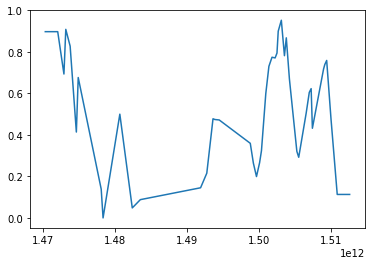

In [25]:
plt.plot(clean_a_df_1["system_start_time"], clean_a_df_1["EVI"]);

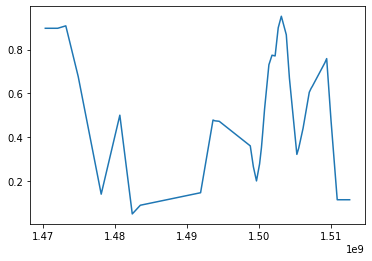

In [26]:
plt.plot(dataTSS["system_start_time"], dataTSS["EVI"]);

['Grant']


In [ ]:
jump_indexes

In [ ]:
dataTS.loc[0:8]

In [ ]:
x_min = 0
x_max = 12
VI = "EVI"
x = dataTS.loc[x_min:x_max, 'system_start_time']
y = dataTS.loc[x_min:x_max, VI]
plt.plot(x, y)

In [ ]:
plt.plot( clean_a_df_1["system_start_time"], clean_a_df_1["EVI"])

In [ ]:
plt.plot(thyme_vec, Veg_indks)

In [ ]:
plt.plot(thyme_vec, Veg_indks)

In [ ]:
dataTS[8:14]

In [ ]:
clean_a_df_1[8:14]


#   Try to remove outliers inplace without copying anything.


In [35]:
East_2018 = pd.read_csv("/Users/hn/Documents/01_research_data/" + \
                        "remote_sensing/01_NDVI_TS/00_Eastern_WA_withYear/" + \
                        "2Years/Eastern_WA_2018_70cloud_selectors.csv", low_memory=False)

In [38]:
East_2018 = East_2018[East_2018['county'] == "Whitman"]

In [41]:
len(East_2018.ID.unique())

26650

In [44]:
a = np.array([1,1,-1,-2,-3,4,5])
asign = np.sign(a)
signchange = ((np.roll(asign, 1) - asign) != 0).astype(int)
print (signchange)

[0 0 1 0 0 1 0]


In [45]:
asign

array([ 1,  1, -1, -1, -1,  1,  1])